## Portfolio Assignment week 04
This first week of the *supervised* part of machine learning is focused on the mathematical background of creating models. Therefore, during this exercise you are required to program the complete technique of *gradient descent* by hand. Later, we will off course just use [sklearn SGDRegressor](https://scikit-learn.org/stable/modules/sgd.html) for this.

Download and load the file `housing-data.txt`, which you can find on assemblix2019 (`/data/datasets/DS3/`). This is actually just random data, but for the sake of argument we will pretend it represents the prices of houses in Groningen as a function of their sizes. 

In [1]:
# import the general libraries
import yaml
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

1. Load the data and create a scatter plot. As you will see, there seems to be a nice linear relationship between the size (on the horizontal axis) and the price (on the vertical axis).

I will use a configue file for this aim.

In [2]:
#inspired by https://fennaf.gitbook.io/bfvm22prog1/data-processing/configuration-files/yaml

def configReader():
    """
    explanation: This function open config,yaml file 
    and fetch the gonfigue file information
    input: ...
    output: configue file
    """
    with open("config.yaml", "r") as inputFile:
        config = yaml.safe_load(inputFile)
    return config

In [3]:
def dataframe_maker(config):
    file_directory, file_name = config.values()
    os.chdir(file_directory)
    df = pd.read_csv("housing-data.txt", sep=",")
    return df
df = dataframe_maker(configReader())
df.head()

,size,price
0,30.0,75.760161
1,31.0,81.662679
2,32.0,60.944950
3,33.0,67.890597
4,34.0,87.957014


In [73]:
def making_scatter_plot(df, y_prime=[]):
    #make the figure
    fig = plt.figure()

    plt.scatter(x = df['size'], y = df['price'], s=8, c='b', label='Data Points')
    
    if len(y_prime) !=0:
        plt.plot(df['size'], y_prime, c='r', label='Prediction Curve')

    plt.title('House size vs House price')
    plt.xlabel('Size')
    plt.ylabel('Price')
    plt.legend()
    plt.show()

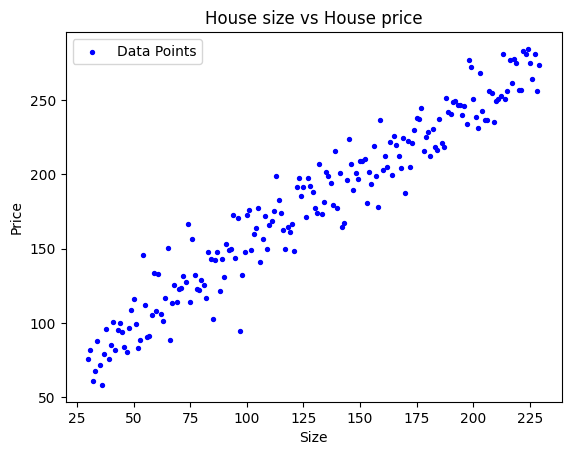

In [74]:
making_scatter_plot(df)

As we have discussed, the general formula for the cost of a model is as follows:

$$
J(\theta) = \frac{1}{2m} \sum_{i=1}^{m} ( h_\theta(x^{(i)}) - y^{(i)} ) ^2 
$$

2. Write a function `compute_cost` that receives a matrix `X` (of size $m \times n$), a vector `y` (of size $m \times 1$) and a vector `theta` (of size $n+1 \times 1$) and returns the total cost based on the formula above. For this to work correctly, you will need to add a column of 1's to the original `X`-matrix

When we call `compute-cost` with a value of `theta` of `[0,0]`, the total cost will probably be extremely high. In the next step, you need to update the values of this vector in order to minimize $J(\theta)$.

In [7]:
def compute_cost(X, y, theta):

    # calculate h
    H = X @ theta

    # implement the cost function
    j = np.sum((H - y)**2) / (2. * y.shape[0])

    return j

# test the funtion 
X = np.stack((np.ones(df['size'].shape[0]), df['size']), axis=1)

cost = compute_cost(X=X, y=df['price'], theta=[0, 0])
print(f'cost when theta is [0 0]: {cost.round(3)}')

cost when theta is [0 0]: 17840.781


Which is a quite high number.

As we have discussed, the technique we are using for this is *gradient descent*: every step of this descent, we update the values of `theta` as follows:

$$
\theta_j := \theta_j - \alpha \frac{1}{m}\sum_{i=1}^{m}(h_\theta(x^{(i)}) - y^{(i)})x^{(i)}_j
$$

3. Make a function `gradient_descent`, that receives the matrix `X`, the vectors `y` and `theta`, the learning curve `alpha` and a `num_iters`. In this method, performs `num_iters` steps of the gradient descent, calculating the cost $J(\theta)$ every step and storing that in a list. After the `num_iters`, this function needs to return the found value of `theta` and the list of all the costs.

In [77]:
def gradient_decent(X, y, theta, alpha, num_iters):

    cost_list = []

    # find the number of observations
    m = y.shape[0]

    # add a column of one to X
    X = np.stack((np.ones(X.shape[0]), X), axis=1)

    # iterate to through gradient decent algorithm
    for count in range(num_iters):

        # add cost to the list
        cost_list.append(compute_cost(X, y, theta))

        # calculate gradient decent
        coef_list = (alpha * np.array(X @ theta - y)) / m

        # multiply each coefficient in the list to its row counterpart in the X matrix, and sum all the rows
        correction_array = np.sum((coef_list * X.T).T  , axis = 0)

        theta = theta - correction_array

    return theta, cost_list

theta, cost_list = gradient_decent(X=df['size'], y=df['price'], theta=[50,0], alpha=1e-7, num_iters=2000)    
print(f'theta: {theta}')

theta: [50.0063919   0.97956895]


To evaluate the outcome of this technique, I will use the coeficient list (theta) to construct the predicted line and compare the result with the actual input.

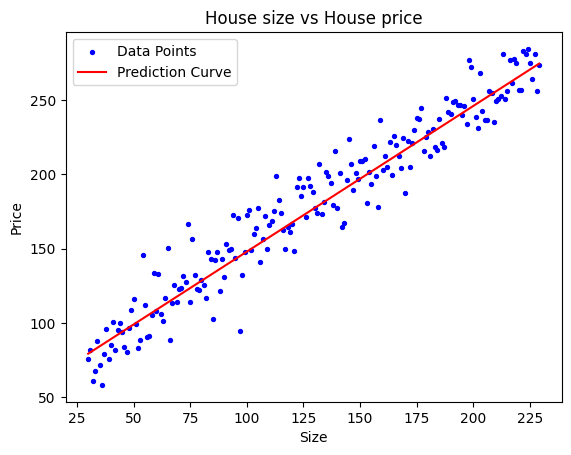

In [78]:
# calculate the prediction and sketch it
y_prime = theta[0] + df['size'] * theta[1]
making_scatter_plot(df, y_prime)

The prediction demonstrates a strong conformation with the experimental data. However, one should be cautious about the selection of an appropriate theta-zero for this methodology since it can make a huge difference in the outcome of the method.


4. Create a plot of the values of $J(\theta)$ that `compute_costs` has found. Do you see a decrease in the total costs?



In [79]:
def drawing_costs(cost_list):
    fig = plt.figure()

    plt.plot(cost_list,  label='cost')

    plt.title('Calculated costs')
    plt.xlabel('number of iterations')
    plt.ylabel('Cost')
    plt.legend()
    plt.show()   

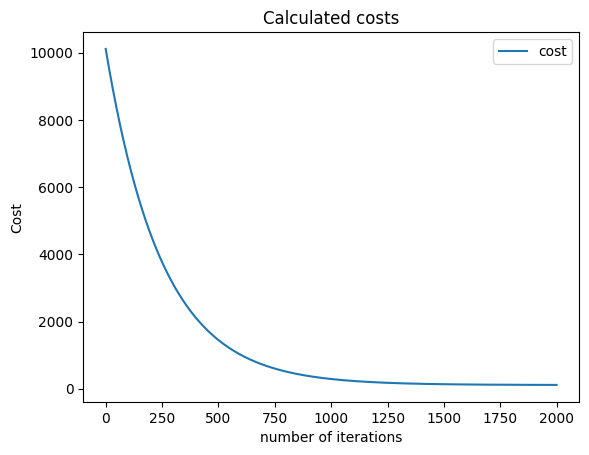

In [80]:
drawing_costs(cost_list)

As it can be seen, cost decrease drastically over iteration. 